In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

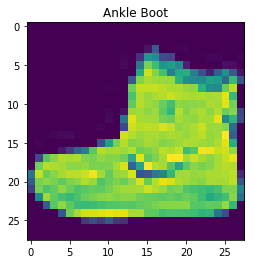

In [17]:
label_maps={
     0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",

}

plt.title(label_maps[label])
sample=next(iter(training_data))
plt.imshow(image.squeeze())

## customdataset

In [19]:
import os
import pandas as pd
from torchvision.io import read_image


class customdata(Dataset):
    def __init__(self,annotations_file,img_dir,transform=None,target_transform=None):
        self.img_labels=pd.read_csv(annotation_file)
        self.img_dir=img_dir
        self.transform=transform
        self.target_transform=target_transform
    
    def __len__(self):
        return len(self.img_labels)
    def __getitem__(self,idx):
        img_path=os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
        image=read_image(img_path)
        label=self.img_labels.iloc[idx,1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
               
               
               
               
               
               
        


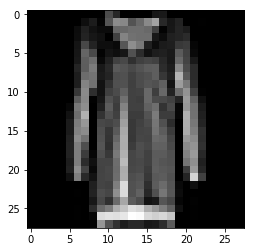

Label: 2


In [20]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)
# Display image and label.
train_imges, train_labels = next(iter(train_dataloader))

img = train_imges[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## TRANSFORMS

In [21]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)